<a href="https://colab.research.google.com/github/orinbou/MathPythonColab/blob/main/chapter/%E7%AC%AC13%E5%9B%9E%E3%80%80Python%E3%81%A7%E4%B8%89%E8%A7%92%E9%96%A2%E6%95%B0%EF%BC%81%EF%BD%9E%E3%82%B5%E3%82%A6%E3%83%B3%E3%83%89%E3%82%82%E4%BD%9C%E6%88%90%E3%81%97%E3%81%A6%E3%81%BF%E3%82%88%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目標1： 弧度法による角度の表し方を確認する

In [ ]:
import numpy as np

deg = float(input("度単位で角度を入力してください："))
# 入力例：
# 度単位で角度を入力してください：90   # 90と入力する

print("換算結果は:", deg * np.pi / 180, "ラジアン")
print("radians関数による検算:", np.radians(deg), "ラジアン")

度単位で角度を入力してください：180
換算結果は: 3.141592653589793 ラジアン
radians関数による検算: 3.141592653589793 ラジアン


# 目標2： 単位円を描いて余弦（cos）と正弦（sin）は何かを確認する

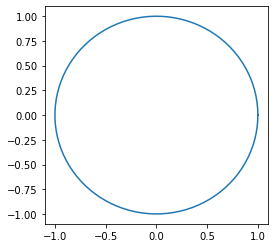

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

thetas = np.linspace(0, 2*np.pi, 100)
x = np.cos(thetas)
y = np.sin(thetas)

plt.figure(figsize=(4, 4))
plt.plot(x, y)
plt.show()

In [ ]:
import numpy as np

theta = float(input("角度を入力してください："))
# 入力例：
# 角度を入力してください：3.14  # 3.14と入力する

print(np.cos(theta)**2 + np.sin(theta)**2)

角度を入力してください：90
1.0


# 目標3： 周期や周波数を変えてsin関数のグラフを描く

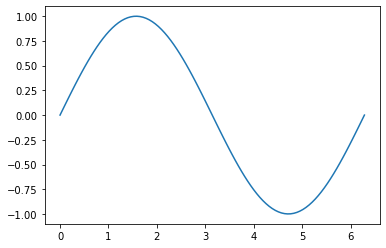

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0, 2*np.pi, 100)
data = np.sin(theta)

plt.plot(theta, data)
plt.show()

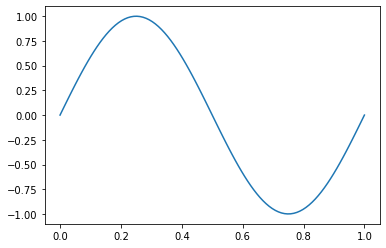

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 1, 100)
data = np.sin(2*np.pi * t)

plt.plot(t, data)
plt.show()

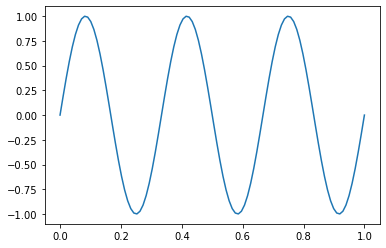

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 1, 100)
freq = 3  # 周波数
data = np.sin(2*np.pi * freq * t)

plt.plot(t, data)
plt.show()

# 練習問題と解答例

## （1）2つのベクトルの成す角のcosθの値を求める

In [ ]:
import numpy as np
a = np.array([1, 3, 4])
b = np.array([2, -1, 3])
print(a@b / np.sqrt(a@a * b@b))
print(a@b / (np.sqrt(a@a) * np.sqrt(b@b)))

print("--")
print(np.sqrt(6))
print(np.sqrt(2 * 3))
print(np.sqrt(2) * np.sqrt(3))
print("--")
print(np.sqrt(9))
print(np.sqrt(3 * 3))
print(np.sqrt(3) * np.sqrt(3))

0.5765566601970551
0.5765566601970551
--
2.449489742783178
2.449489742783178
2.4494897427831783
--
3.0
3.0
2.9999999999999996


## （2）sin関数を使ってサウンド（「ラ」の音）を作る

0.99999994 -0.99999994


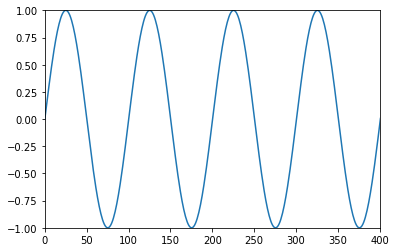

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def makesound(freq, duration, rate):
  n = rate * duration # データ数
  t = np.linspace(0, duration, n)
  sample = np.sin(2*np.pi * freq * t)
  return sample.astype(np.float32)

freq = 440
duration = 1
rate = 44100
sample = makesound(freq, duration, rate)

# サウンドを保存する
wavfile.write('sample.wav', rate, sample)
print(max(sample), min(sample))  # 振幅が適切かどうかを確認しておく

# 一部だけグラフを表示
plt.plot(sample)
plt.axis([0, 400, -1.0, 1.0])
plt.show()

## （3）WAVファイルを読み込んで情報や波形を表示する

In [ ]:
# WAVファイルをGoogle Colabにダウンロードする（1回実行しておけばよい)
!wget "https://raw.githubusercontent.com/Gessys/math/main/data/la.wav"

--2023-01-06 09:50:52--  https://raw.githubusercontent.com/Gessys/math/main/data/la.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105884 (103K) [audio/wav]
Saving to: ‘la.wav’

la.wav              100%[===================>] 103.40K  --.-KB/s    in 0.02s   

2023-01-06 09:50:52 (4.66 MB/s) - ‘la.wav’ saved [105884/105884]



サンプリング周波数： 44100
データのタイプ： int16
チャンネル数： 1
持続時間: 1.2


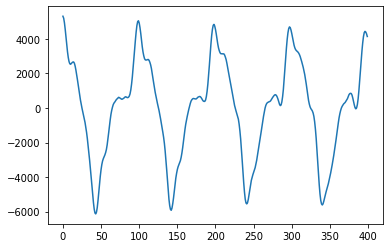

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# WAVファイルを読み込む
rate, data = wavfile.read('la.wav')
print('サンプリング周波数：', rate)
print('データのタイプ：', data.dtype)
print('チャンネル数：', data.ndim)
print('持続時間:', len(data) / rate)

# グラフを描画する
start = np.argmax(data) # 振幅が最大となる位置
end = start + 400
sample = data[start:end]
plt.plot(sample)
plt.show()

In [ ]:
def hanning(n, sym=True):
  x = np.linspace(0, 1, n, endpoint=sym)
  return 0.5 - 0.5 * np.cos(2*np.pi * x)

# 動作確認のためのコード
print(hanning(6, True))
print(hanning(6, False))

[0.        0.3454915 0.9045085 0.9045085 0.3454915 0.       ]
[0.   0.25 0.75 1.   0.75 0.25]


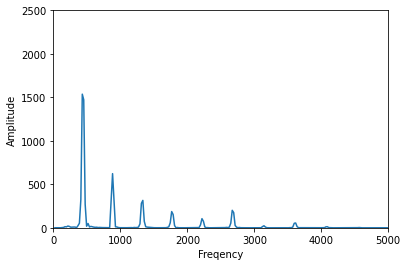

In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# ハニング窓関数
def hanning(n, sym=True):
  x = np.linspace(0, 1, n, endpoint=sym)
  return 0.5 - 0.5 * np.cos(2*np.pi * x)

# WAVファイルを読み込む
rate, data = wavfile.read('la.wav')

# 分析対象の範囲
start = np.argmax(data)
end = start + 2048
sample = data[start:end]

# ハニング窓を適用
n = len(sample)
w = hanning(n)
sample = (sample * w).astype(np.int16)

# 離散フーリエ変換により、周波数成分を表示する
sp = np.fft.fft(sample)
amp = np.abs(sp/(n/2))   # 振幅の配列（縦軸の値）
f = np.fft.fftfreq(n, d=1/rate)   # 周波数の配列（横軸の値）
plt.plot(f[1: n//2], amp[1: n//2])
plt.xlabel("Freqency")
plt.ylabel("Amplitude")
plt.axis([0, 5000, 0, 2500])   # 主要な部分だけグラフ化
plt.show()